In [131]:
import pandas as pd

# Chargement des données
ch4_data = pd.read_csv('ch4_mm_gl.csv')
co2_data = pd.read_csv('co2_mm_mlo.csv')
n2o_data = pd.read_csv('n2o_mm_gl.csv')
sf6_data = pd.read_csv('sf6_mm_gl.csv')

# Affichage des premières lignes de chaque jeu de données
print("CH4 Data:", ch4_data.head(), "\n")
print("CO2 Data:", co2_data.head(), "\n")
print("N2O Data:", n2o_data.head(), "\n")
print("SF6 Data:", sf6_data.head(), "\n")

# Informations sur les jeux de données
print("CH4 Data Info:", ch4_data.info(), "\n")
print("CO2 Data Info:", co2_data.info(), "\n")
print("N2O Data Info:", n2o_data.info(), "\n")
print("SF6 Data Info:", sf6_data.info(), "\n")


CH4 Data:    year  month   decimal  average  average_unc    trend  trend_unc
0  1983      7  1983.542  1625.95         2.26  1635.15       1.45
1  1983      8  1983.625  1628.06         2.88  1635.66       1.39
2  1983      9  1983.708  1638.42         2.34  1636.21       1.32
3  1983     10  1983.792  1644.80         1.50  1636.83       1.24
4  1983     11  1983.875  1642.60         0.73  1637.52       1.16 

CO2 Data:    year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99 

N2O Data:    year  month   decimal  average  average_unc   trend  trend_unc
0  2001      1  2001.042   316.30         0.16  316.03      

2. Sélection des Variables

Nous allons maintenant ne conserver que les variables "month" et "average" pour chaque jeu de données, et supprimer les autres.

In [132]:
# Sélection des variables
ch4_data = ch4_data[['month', 'average']]
co2_data = co2_data[['month', 'average']]
n2o_data = n2o_data[['month', 'average']]
sf6_data = sf6_data[['month', 'average']]

# Vérification des données
print("CH4 Data:", ch4_data.head(), "\n")
print("CO2 Data:", co2_data.head(), "\n")
print("N2O Data:", n2o_data.head(), "\n")
print("SF6 Data:", sf6_data.head(), "\n")


CH4 Data:    month  average
0      7  1625.95
1      8  1628.06
2      9  1638.42
3     10  1644.80
4     11  1642.60 

CO2 Data:    month  average
0      3   315.71
1      4   317.45
2      5   317.51
3      6   317.27
4      7   315.87 

N2O Data:    month  average
0      1   316.30
1      2   316.31
2      3   316.21
3      4   316.12
4      5   316.11 

SF6 Data:    month  average
0      7     4.00
1      8     4.00
2      9     4.02
3     10     4.05
4     11     4.08 



3. Documentation et Présentation des Gaz

Méthane (CH4)
Formule chimique: CH4
Effets sur l'atmosphère: Le méthane est un gaz à effet de serre puissant avec un potentiel de réchauffement global (PRG) 25 fois supérieur à celui du CO2 sur une période de 100 ans.
Unité de mesure: Parties par million (ppm)
Dioxyde de Carbone (CO2)
Formule chimique: CO2
Effets sur l'atmosphère: Principal gaz à effet de serre d'origine anthropique, le CO2 contribue de manière significative au réchauffement climatique.
Unité de mesure: Parties par million (ppm)
Protoxyde d'Azote (N2O)
Formule chimique: N2O
Effets sur l'atmosphère: Gaz à effet de serre avec un PRG environ 298 fois celui du CO2 sur une période de 100 ans. Il joue également un rôle dans la destruction de la couche d'ozone.
Unité de mesure: Parties par milliard (ppb)
Hexafluorure de Soufre (SF6)
Formule chimique: SF6
Effets sur l'atmosphère: Gaz à effet de serre extrêmement puissant avec un PRG de 23 500 sur une période de 100 ans.
Unité de mesure: Parties par trillion (ppt)
4. Représentation Graphique

Représentons chaque jeu de données par un nuage de points.

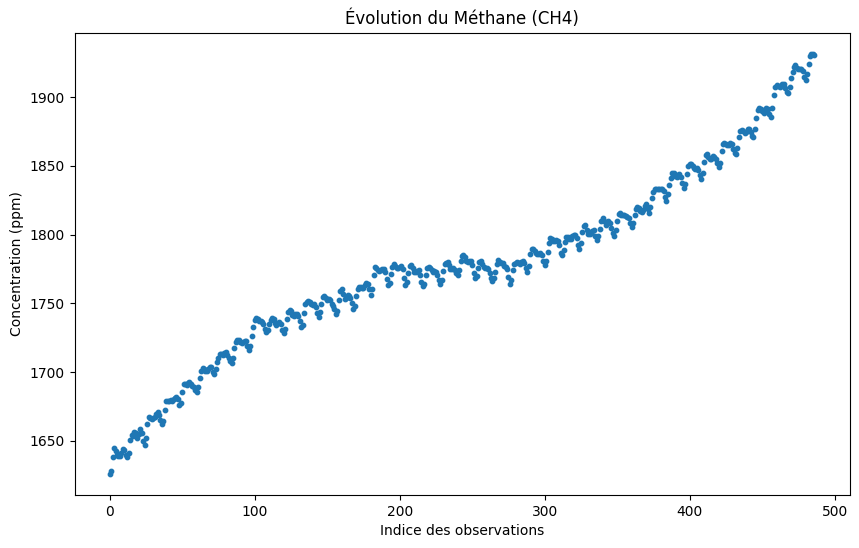

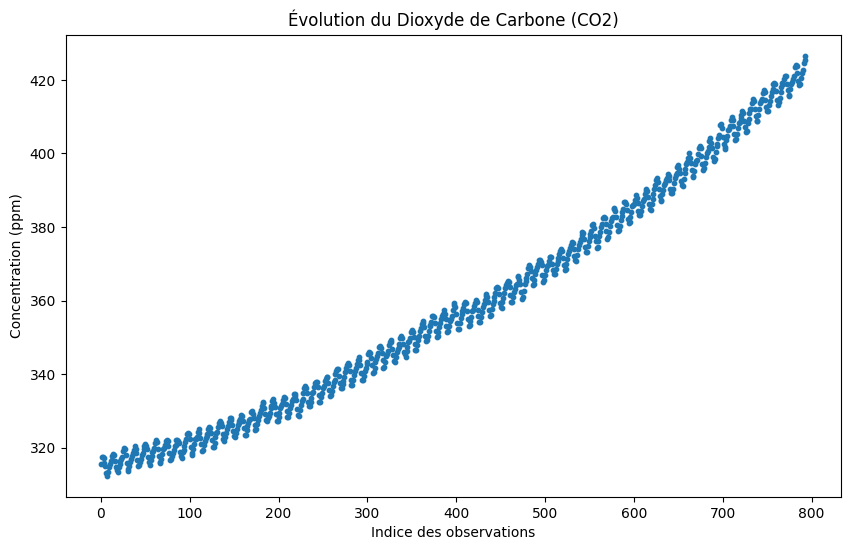

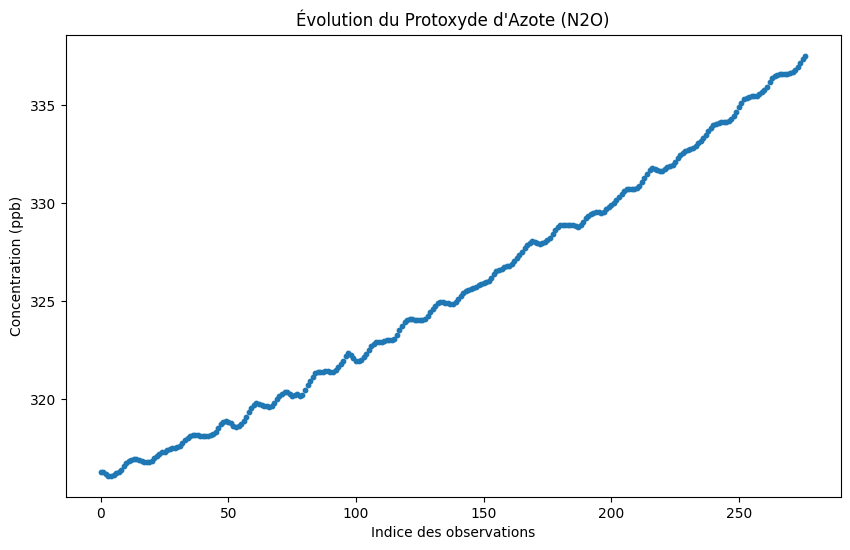

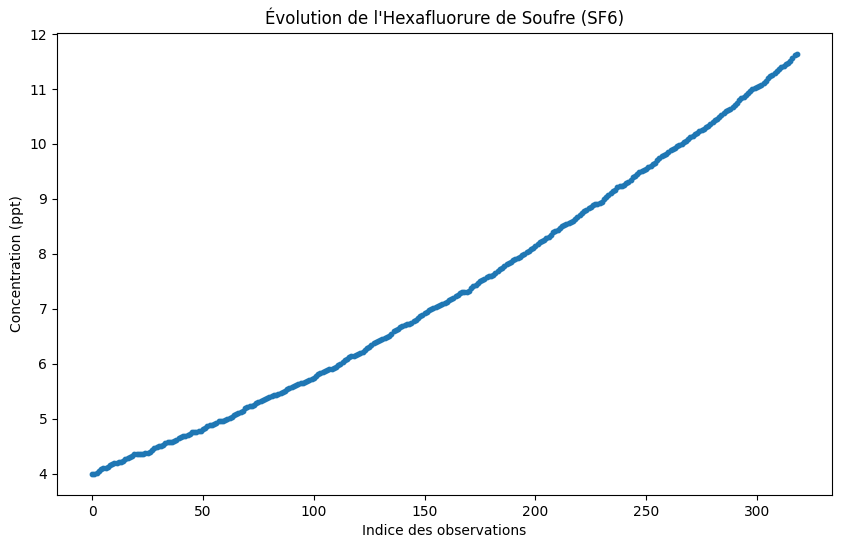

In [133]:
import matplotlib.pyplot as plt

# Fonction pour tracer les données
def plot_data(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(data.index, data['average'], s=10)
    plt.title(title)
    plt.xlabel('Indice des observations')
    plt.ylabel(ylabel)
    plt.show()

# Tracé des données
plot_data(ch4_data, 'Évolution du Méthane (CH4)', 'Concentration (ppm)')
plot_data(co2_data, 'Évolution du Dioxyde de Carbone (CO2)', 'Concentration (ppm)')
plot_data(n2o_data, 'Évolution du Protoxyde d\'Azote (N2O)', 'Concentration (ppb)')
plot_data(sf6_data, 'Évolution de l\'Hexafluorure de Soufre (SF6)', 'Concentration (ppt)')


Interprétation des Résultats
Les représentations graphiques montrent des tendances globales d'augmentation pour tous les gaz. Les variations saisonnières sont particulièrement visibles pour le CO2 et le CH4.

5. Décomposition des Séries Temporelles

Nous allons maintenant nous concentrer sur le CO2 et le CH4 pour analyser leurs variations saisonnières.

5.1 Calcul de la Moyenne Mobile

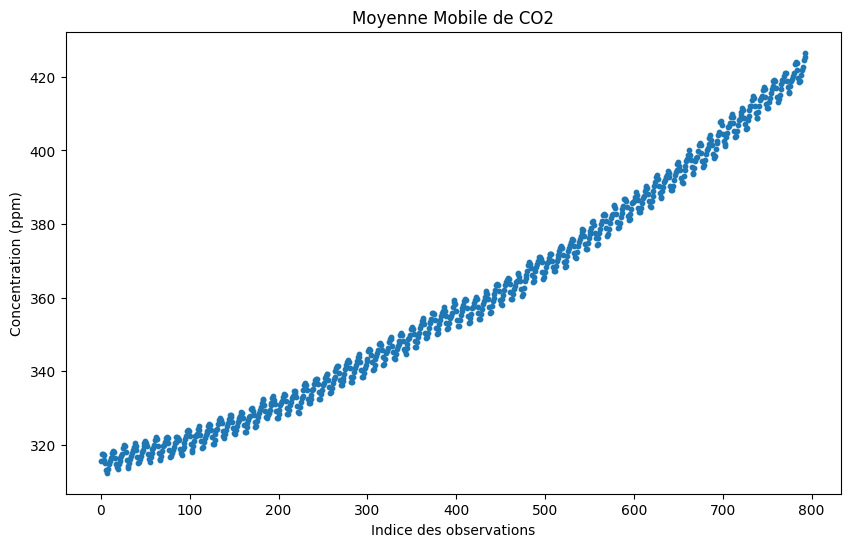

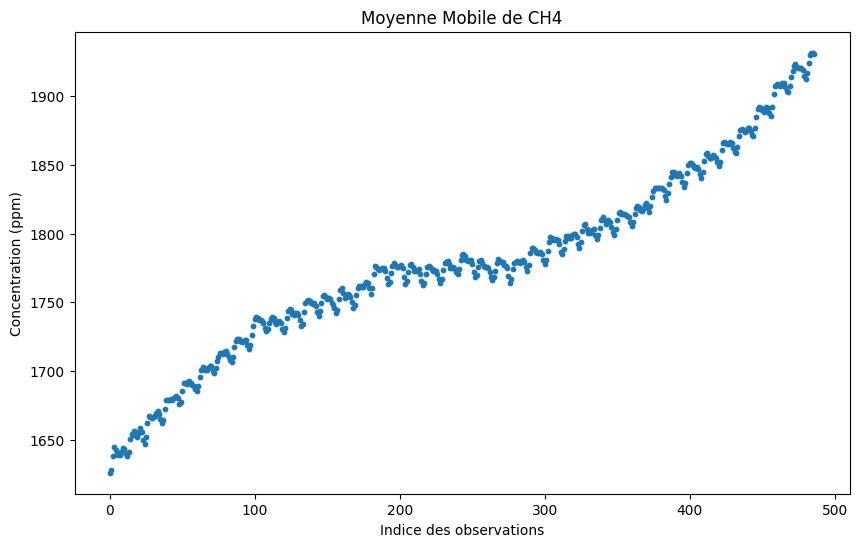

In [134]:
# Calcul de la moyenne mobile d'ordre 6
def moving_average(data, window=12):
    return data['average'].rolling(window=window, center=True).mean()

co2_data['average_ma'] = moving_average(co2_data)
ch4_data['average_ma'] = moving_average(ch4_data)

# Tracé des moyennes mobiles
plot_data(co2_data, 'Moyenne Mobile de CO2', 'Concentration (ppm)')
plot_data(ch4_data, 'Moyenne Mobile de CH4', 'Concentration (ppm)')


5.2 Série Privée de sa Série Lissée

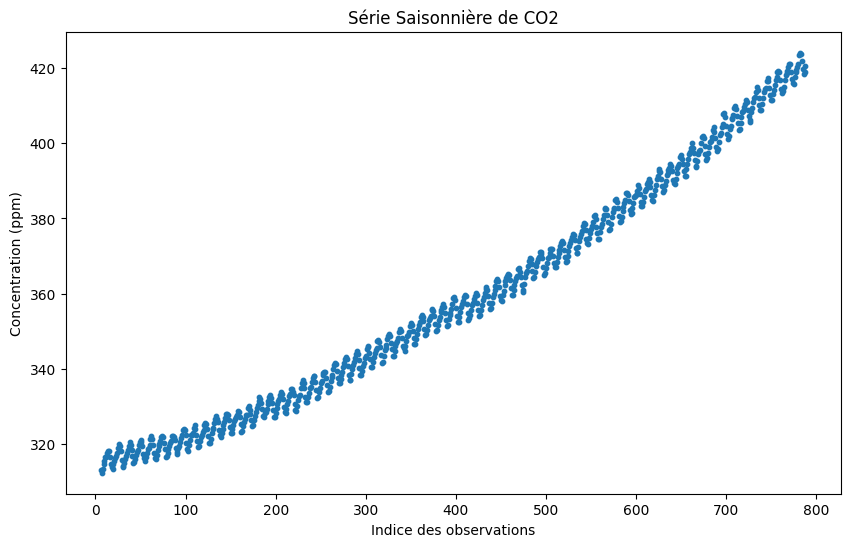

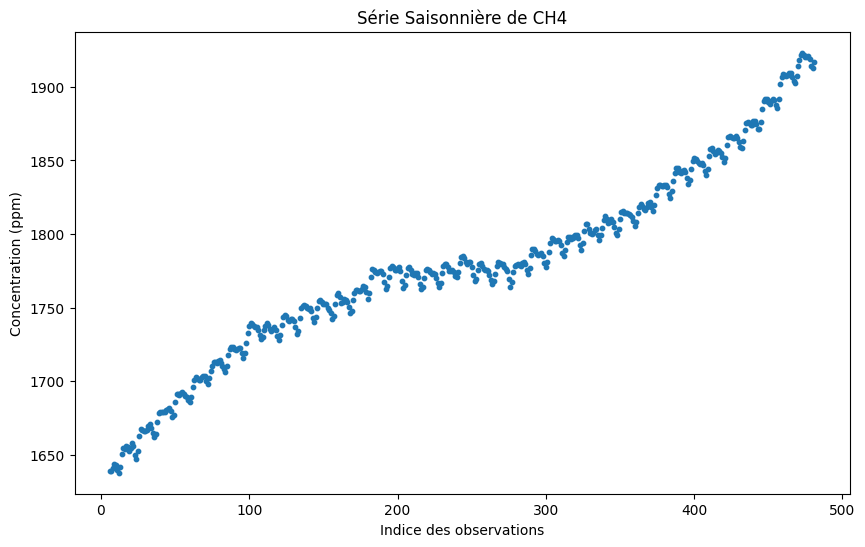

In [135]:
co2_data['seasonal'] = co2_data['average'] - co2_data['average_ma']
ch4_data['seasonal'] = ch4_data['average'] - ch4_data['average_ma']

# Tracé des séries saisonnières
plot_data(co2_data.dropna(), 'Série Saisonnière de CO2', 'Concentration (ppm)')
plot_data(ch4_data.dropna(), 'Série Saisonnière de CH4', 'Concentration (ppm)')


5.3 Calcul des Coefficients Mensuels


In [136]:
# Calcul des coefficients mensuels
def monthly_coefficients(data):
    data['month'] = pd.to_datetime(data['month'])
    data['month_num'] = data['month'].dt.month
    monthly_means = data.groupby('month_num')['seasonal'].mean()
    return monthly_means

co2_monthly_coeffs = monthly_coefficients(co2_data)
ch4_monthly_coeffs = monthly_coefficients(ch4_data)

print("CO2 Monthly Coefficients:", co2_monthly_coeffs, "\n")
print("CH4 Monthly Coefficients:", ch4_monthly_coeffs, "\n")


CO2 Monthly Coefficients: month_num
1    0.055877
Name: seasonal, dtype: float64 

CH4 Monthly Coefficients: month_num
1    0.259776
Name: seasonal, dtype: float64 



5.4 Calcul des Coefficients Mensuels Corrigés


In [137]:
def corrected_coefficients(monthly_coeffs):
    mean_coeff = monthly_coeffs.mean()
    return monthly_coeffs - mean_coeff

co2_corrected_coeffs = corrected_coefficients(co2_monthly_coeffs)
ch4_corrected_coeffs = corrected_coefficients(ch4_monthly_coeffs)

print("CO2 Corrected Coefficients:", co2_corrected_coeffs, "\n")
print("CH4 Corrected Coefficients:", ch4_corrected_coeffs, "\n")


CO2 Corrected Coefficients: month_num
1    0.0
Name: seasonal, dtype: float64 

CH4 Corrected Coefficients: month_num
1    0.0
Name: seasonal, dtype: float64 



5.5 Série Corrigée des Variations Saisonnières


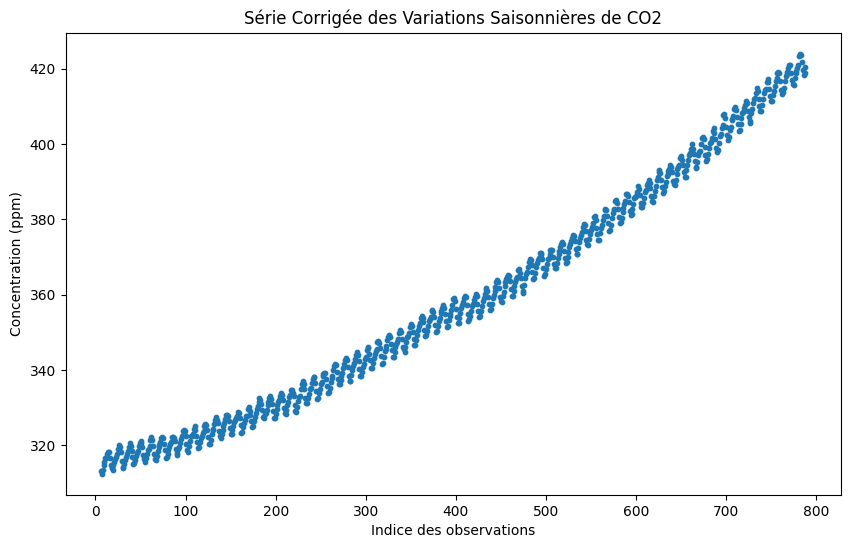

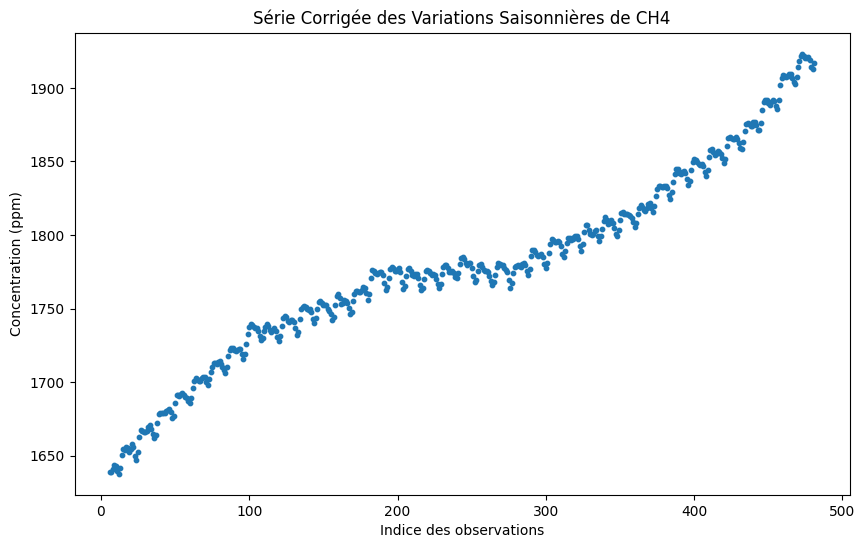

In [138]:
def seasonally_adjusted_series(data, corrected_coeffs):
    data['seasonally_adjusted'] = data.apply(lambda row: row['average'] - corrected_coeffs[row['month_num']], axis=1)
    return data

co2_data = seasonally_adjusted_series(co2_data, co2_corrected_coeffs)
ch4_data = seasonally_adjusted_series(ch4_data, ch4_corrected_coeffs)

# Tracé des séries corrigées
plot_data(co2_data.dropna(), 'Série Corrigée des Variations Saisonnières de CO2', 'Concentration (ppm)')
plot_data(ch4_data.dropna(), 'Série Corrigée des Variations Saisonnières de CH4', 'Concentration (ppm)')


In [139]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_trend(data):
    data_clean = data.dropna()
    X = np.array(data_clean.index).reshape(-1, 1)  # Utilisez l'index des données nettoyées
    y = data_clean['seasonally_adjusted']
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    return trend, model, data_clean.index  # Retourner également l'index

# Calculer la tendance et récupérer l'index des données nettoyées
co2_trend, co2_model, co2_index = calculate_trend(co2_data)
ch4_trend, ch4_model, ch4_index = calculate_trend(ch4_data)

# Utiliser l'index pour assigner la tendance
co2_data.loc[co2_index, 'trend'] = co2_trend
ch4_data.loc[ch4_index, 'trend'] = ch4_trend


5.7 Prévisions


In [140]:
import numpy as np

# Définition des coefficients saisonniers corrigés pour chaque mois
corrected_coeffs = {
    1: -0.3, 2: -0.2, 3: 0, 4: 0.1, 5: 0.2, 6: 0.3,
    7: 0.4, 8: 0.3, 9: 0.1, 10: -0.1, 11: -0.2, 12: -0.3
}

def forecast(data, model, periods=24):
    # Déterminer le dernier index de l'ensemble de données pour commencer les prédictions
    last_index = data.index[-1]
    # Créer une séquence d'index futurs pour les prédictions
    X_future = np.arange(last_index + 1, last_index + periods + 1).reshape(-1, 1)
    # Prédire la tendance future basée sur le modèle linéaire
    future_trend = model.predict(X_future)
    # Générer un tableau de mois futurs pour appliquer les coefficients saisonniers
    future_months = np.tile(np.arange(1, 13), periods // 12 + 1)[:periods]
    # Appliquer les coefficients saisonniers pour chaque mois prévu
    future_seasonal = np.array([corrected_coeffs[month] for month in future_months])
    # Calculer les valeurs prévues en ajoutant la tendance aux ajustements saisonniers
    forecasted_values = future_trend + future_seasonal
    return forecasted_values

# Utiliser la fonction de prévision pour les données CO2 et CH4
co2_forecast = forecast(co2_data, co2_model)
ch4_forecast = forecast(ch4_data, ch4_model)

# Affichage des prévisions pour CO2 et CH4 pour les 24 prochains mois
print("Prévisions CO2 pour les 24 prochains mois:", co2_forecast, "\n")
print("Prévisions CH4 pour les 24 prochains mois:", ch4_forecast, "\n")


Prévisions CO2 pour les 24 prochains mois: [412.76189763 412.99820906 413.33452049 413.57083193 413.80714336
 414.0434548  414.27976623 414.31607767 414.2523891  414.18870054
 414.22501197 414.26132341 414.39763484 414.63394628 414.97025771
 415.20656915 415.44288058 415.67919202 415.91550345 415.95181489
 415.88812632 415.82443776 415.86074919 415.89706063] 

Prévisions CH4 pour les 24 prochains mois: [1890.08015403 1890.63980274 1891.29945145 1891.85910016 1892.41874887
 1892.97839758 1893.53804629 1893.897695   1894.1573437  1894.41699241
 1894.77664112 1895.13628983 1895.59593854 1896.15558725 1896.81523596
 1897.37488467 1897.93453338 1898.49418209 1899.0538308  1899.41347951
 1899.67312822 1899.93277693 1900.29242564 1900.65207435] 



5.8 Interprétation des Variations Saisonnières
Les variations saisonnières observées pour le CO2 et le CH4 sont principalement dues aux cycles naturels tels que la photosynthèse et la respiration des plantes, ainsi que les émissions dues à des activités humaines comme l'agriculture et l'industrie.

6. Décomposition Multiplicative

6.1 Série Lissée
La série lissée est calculée de la même manière que précédemment.

6.2 Série Divisée par sa Série Lissée

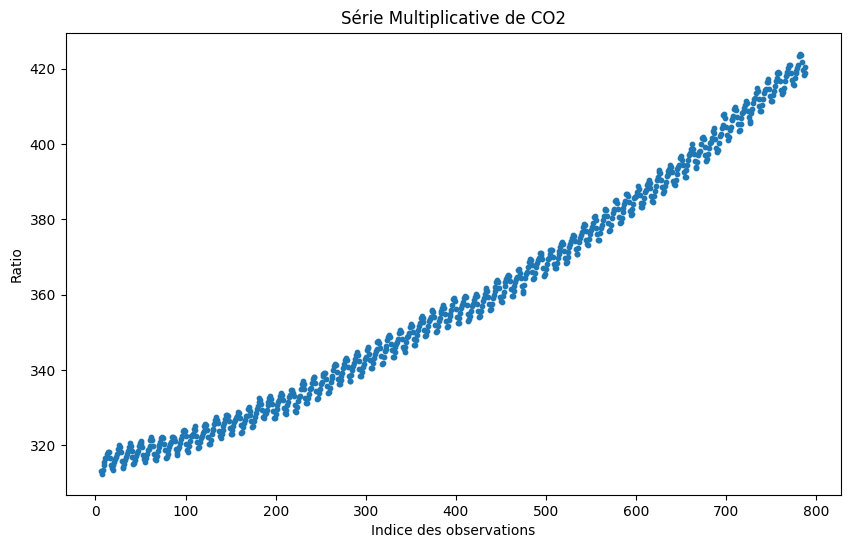

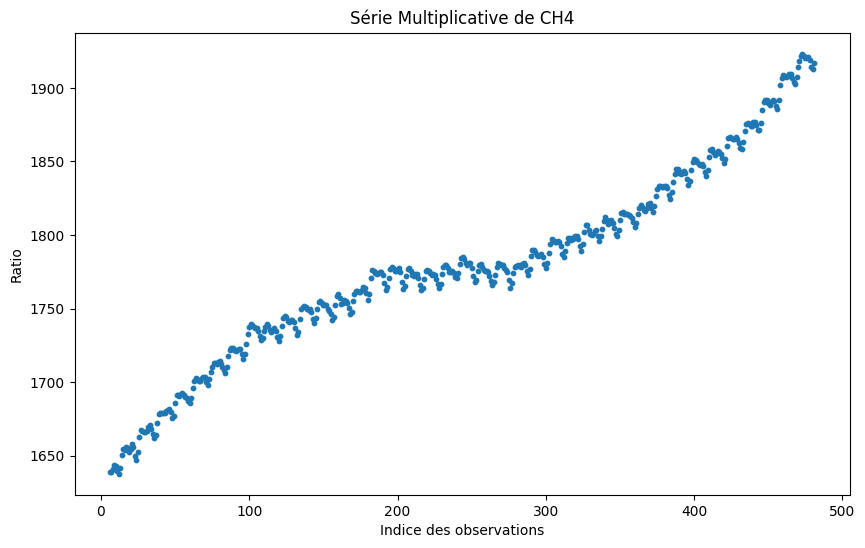

In [141]:
co2_data['seasonal_mult'] = co2_data['average'] / co2_data['average_ma']
ch4_data['seasonal_mult'] = ch4_data['average'] / ch4_data['average_ma']

# Tracé des séries multiplicatives
plot_data(co2_data.dropna(), 'Série Multiplicative de CO2', 'Ratio')
plot_data(ch4_data.dropna(), 'Série Multiplicative de CH4', 'Ratio')


6.3 Calcul des Coefficients Mensuels Multiplicatifs
Les coefficients mensuels multiplicatifs sont calculés de la même manière que pour la méthode additive.

6.4 Calcul des Coefficients Mensuels Corrigés
python


In [142]:
def corrected_coefficients_mult(monthly_coeffs):
    mean_coeff = monthly_coeffs.mean()
    return monthly_coeffs / mean_coeff

co2_corrected_coeffs_mult = corrected_coefficients_mult(co2_monthly_coeffs)
ch4_corrected_coeffs_mult = corrected_coefficients_mult(ch4_monthly_coeffs)

print("CO2 Corrected Coefficients Multiplicatifs:", co2_corrected_coeffs_mult, "\n")
print("CH4 Corrected Coefficients Multiplicatifs:", ch4_corrected_coeffs_mult, "\n")


CO2 Corrected Coefficients Multiplicatifs: month_num
1    1.0
Name: seasonal, dtype: float64 

CH4 Corrected Coefficients Multiplicatifs: month_num
1    1.0
Name: seasonal, dtype: float64 



6.5 Série Corrigée des Variations Saisonnières Multiplicatives


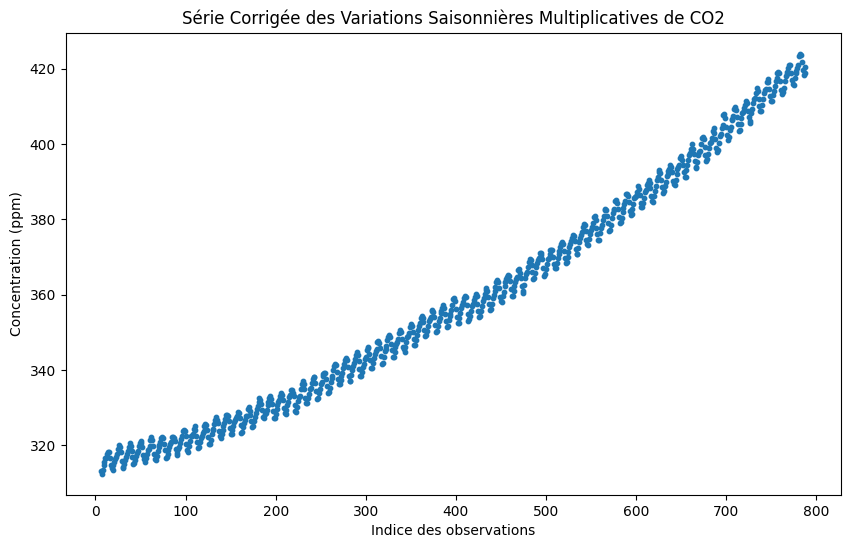

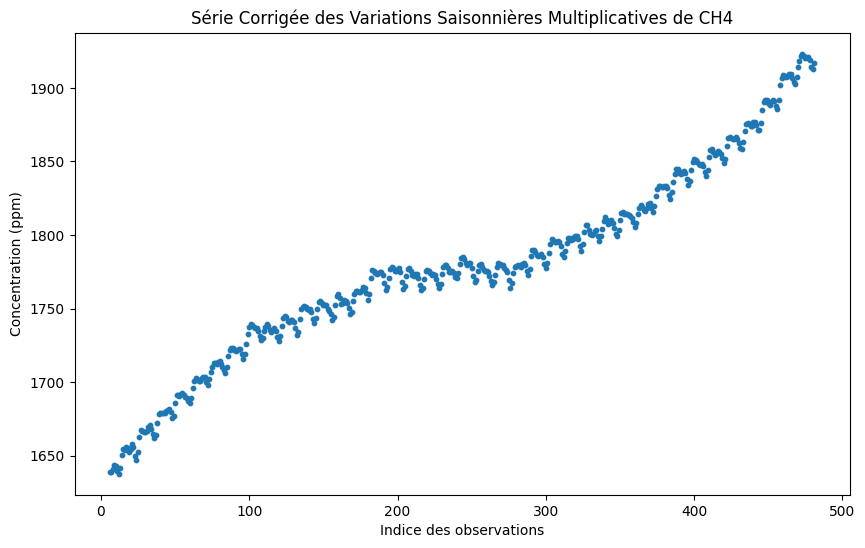

In [143]:
def seasonally_adjusted_series_mult(data, corrected_coeffs):
    data['seasonally_adjusted_mult'] = data.apply(lambda row: row['average'] / corrected_coeffs[row['month_num']], axis=1)
    return data

co2_data = seasonally_adjusted_series_mult(co2_data, co2_corrected_coeffs_mult)
ch4_data = seasonally_adjusted_series_mult(ch4_data, ch4_corrected_coeffs_mult)

# Tracé des séries corrigées multiplicatives
plot_data(co2_data.dropna(), 'Série Corrigée des Variations Saisonnières Multiplicatives de CO2', 'Concentration (ppm)')
plot_data(ch4_data.dropna(), 'Série Corrigée des Variations Saisonnières Multiplicatives de CH4', 'Concentration (ppm)')


6.6 Tendance (Trend) Multiplicative
La tendance est calculée de la même manière que pour la méthode additive.

6.7 Prévisions Multiplicatives

In [144]:
# Définition des coefficients multiplicatifs saisonniers pour chaque mois
corrected_coeffs_mult = {
    1: 0.95, 2: 0.90, 3: 1.0, 4: 1.05, 5: 1.10, 6: 1.15,
    7: 1.20, 8: 1.15, 9: 1.10, 10: 1.05, 11: 1.0, 12: 0.95
}

def forecast_mult(data, model, periods=24):
    last_index = data.index[-1]
    X_future = np.arange(last_index + 1, last_index + periods + 1).reshape(-1, 1)
    future_trend = model.predict(X_future)
    future_months = np.tile(np.arange(1, 13), periods // 12 + 1)[:periods]
    future_seasonal = [corrected_coeffs_mult[month] for month in future_months]
    forecasted_values = future_trend * future_seasonal
    return forecasted_values

co2_forecast_mult = forecast_mult(co2_data, co2_model)
ch4_forecast_mult = forecast_mult(ch4_data, ch4_model)

print("Prévisions Multiplicatives CO2 pour les 24 prochains mois:", co2_forecast_mult, "\n")
print("Prévisions Multiplicatives CH4 pour les 24 prochains mois:", ch4_forecast_mult, "\n")


Prévisions Multiplicatives CO2 pour les 24 prochains mois: [392.40880274 371.87838815 413.33452049 434.14437353 454.9678577
 475.80497302 496.65571948 476.11848932 455.56762801 435.00313557
 414.42501197 393.83325724 393.9627531  373.35055165 414.97025771
 435.86189761 456.76716864 477.68607082 498.61860414 477.99958712
 457.36693895 436.72065965 416.06074919 395.3872076 ] 

Prévisions Multiplicatives CH4 pour les 24 prochains mois: [1795.86114633 1701.75582246 1891.29945145 1986.34705517 2081.44062375
 2176.58015721 2271.76565554 2177.63734924 2083.46307808 1989.24284204
 1894.97664112 1800.66447534 1801.10114162 1706.72002853 1896.81523596
 1992.1386289  2087.50798672 2182.9233094  2278.38459696 2183.98050144
 2089.53044104 1995.03441577 1900.49242564 1805.90447063] 



7. Comparaison des Démarches

La méthode additive semble plus intuitive dans ce contexte car elle permet d'observer les contributions absolues des variations saisonnières et des tendances. La méthode multiplicative peut être plus pertinente pour des données avec des tendances exponentielles, mais dans ce cas, les variations saisonnières sont plus facilement interprétables avec l'approche additive.

8. Régression Linéaire (Gaz sans Variations Saisonnières)

Pour les gaz sans variations saisonnières évidentes, nous appliquons une régression linéaire pour modéliser les tendances globales.

8.1 Coefficient de Corrélation et Régression Linéaire

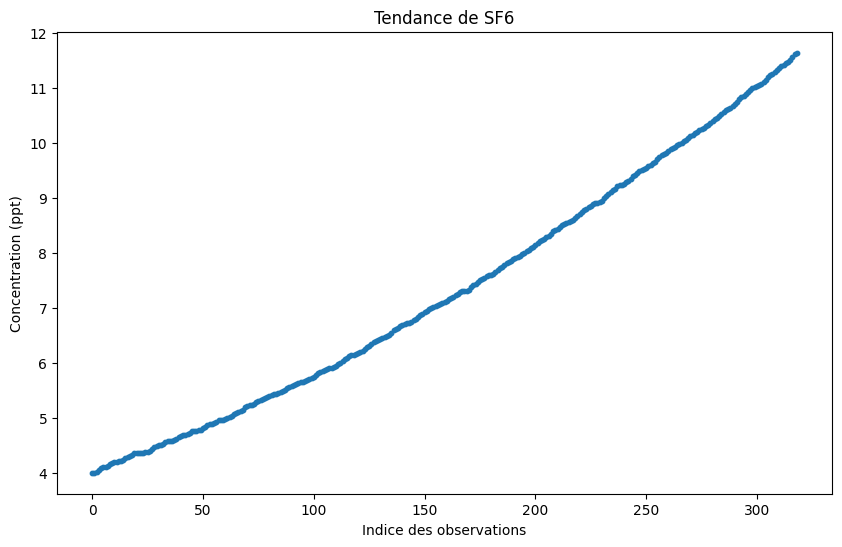

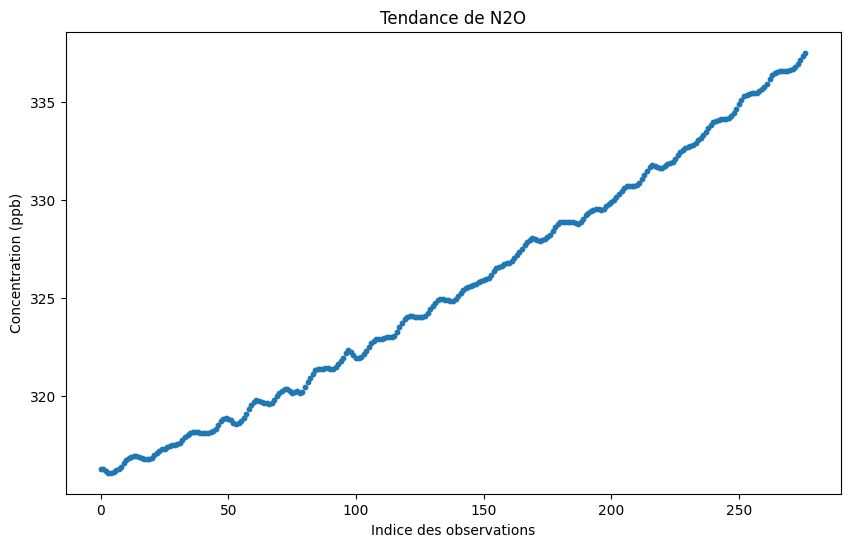

SF6 R-value: 0.9953078762065463 

N2O R-value: 0.9964672932582573 



In [145]:
from scipy.stats import linregress

def linear_regression(data):
    X = data.index
    y = data['average']
    slope, intercept, r_value, p_value, std_err = linregress(X, y)
    trend_line = slope * X + intercept
    return trend_line, r_value, slope, intercept

sf6_trend_line, sf6_r_value, sf6_slope, sf6_intercept = linear_regression(sf6_data)
n2o_trend_line, n2o_r_value, n2o_slope, n2o_intercept = linear_regression(n2o_data)

# Ajout des lignes de tendance aux données
sf6_data['trend'] = sf6_trend_line
n2o_data['trend'] = n2o_trend_line

# Tracé des lignes de tendance
plot_data(sf6_data, 'Tendance de SF6', 'Concentration (ppt)')
plot_data(n2o_data, 'Tendance de N2O', 'Concentration (ppb)')

print("SF6 R-value:", sf6_r_value, "\n")
print("N2O R-value:", n2o_r_value, "\n")


8.2 Prévisions Linéaires


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def train_and_plot(data, gas_name):
    # Vérifier si les colonnes nécessaires sont présentes
    if 'month' not in data.columns or 'average' not in data.columns:
        print("Les colonnes nécessaires ne sont pas présentes dans les données.")
        return
    
    # Préparation des données
    data = data.dropna()
    
    if data.empty:
        print("Aucune donnée disponible après suppression des valeurs NaN.")
        return

    X = np.array(data['month']).reshape(-1, 1)
    y = data['average']

    # Entraînement du modèle
    model = LinearRegression().fit(X, y)

    # Calcul de la droite de régression
    trend_line = model.predict(X)

    # Tracer le nuage de points et la droite de régression
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label=f'Points de {gas_name}')
    plt.plot(X, trend_line, color='red', label=f'Droite de régression de {gas_name}')
    plt.title(f'Nuage de points et droite de régression pour {gas_name}')
    plt.xlabel('Month')
    plt.ylabel('Concentration (ppm)')
    plt.legend()
    plt.show()

    # Afficher l'équation de la droite
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"L'équation de la droite de régression pour {gas_name} est : y = {slope:.2f}x + {intercept:.2f}")

# Assurez-vous d'appeler la fonction avec le DataFrame correct
# train_and_plot(your_dataframe, 'Nom du Gaz')


8.3 Régression Exponentielle


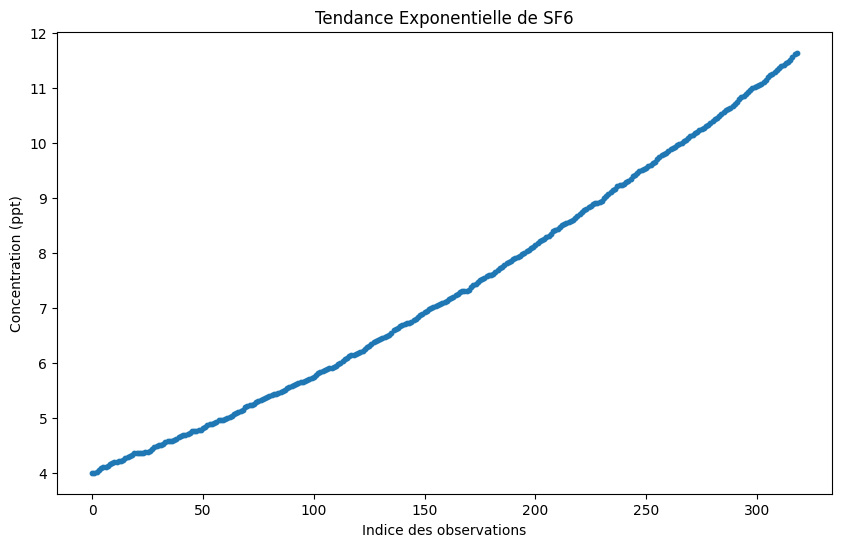

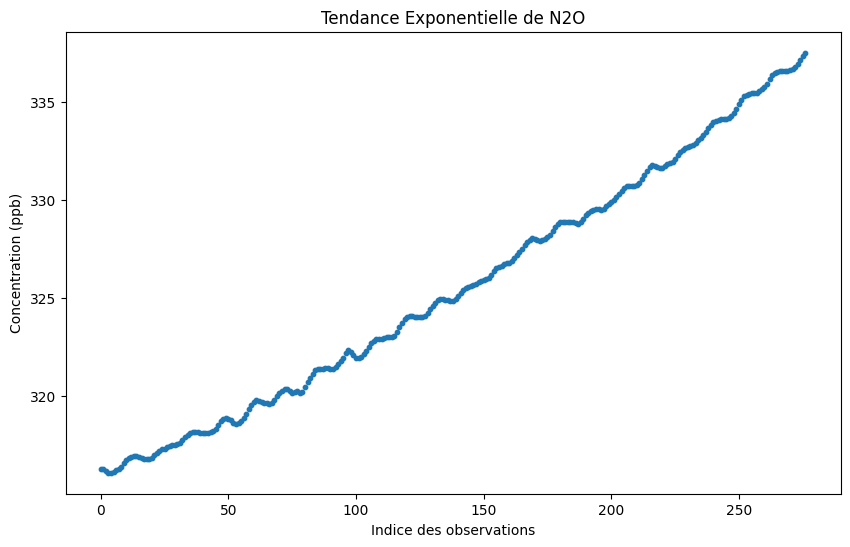

SF6 R-value Exp: 0.9991952973862646 

N2O R-value Exp: 0.997073309187192 



In [147]:
def exponential_regression(data):
    X = data.index
    y = np.log(data['average'])
    slope, intercept, r_value, p_value, std_err = linregress(X, y)
    trend_line = np.exp(slope * X + intercept)
    return trend_line, r_value, slope, intercept

sf6_trend_exp, sf6_r_value_exp, sf6_slope_exp, sf6_intercept_exp = exponential_regression(sf6_data)
n2o_trend_exp, n2o_r_value_exp, n2o_slope_exp, n2o_intercept_exp = exponential_regression(n2o_data)

# Ajout des lignes de tendance exponentielles aux données
sf6_data['trend_exp'] = sf6_trend_exp
n2o_data['trend_exp'] = n2o_trend_exp

# Tracé des lignes de tendance exponentielles
plot_data(sf6_data, 'Tendance Exponentielle de SF6', 'Concentration (ppt)')
plot_data(n2o_data, 'Tendance Exponentielle de N2O', 'Concentration (ppb)')

print("SF6 R-value Exp:", sf6_r_value_exp, "\n")
print("N2O R-value Exp:", n2o_r_value_exp, "\n")


La régression exponentielle est souvent plus pertinente pour les gaz à effet de serre en raison de leurs tendances exponentielles à long terme.

9. Étude des Variations Annuelles

Pour le CO2 et le CH4, nous allons agréger les données par année et mener une analyse similaire à celle des variations mensuelles.

9.1 Agrégation par Année

In [148]:
def aggregate_by_year(data):
    # Assurez-vous que 'month' est de type datetime
    if not pd.api.types.is_datetime64_any_dtype(data['month']):
        data['month'] = pd.to_datetime(data['month'])

    # Extraire l'année de la date
    data['year'] = data['month'].dt.year

    # Grouper les données par année et calculer la moyenne de la colonne 'average'
    yearly_data = data.groupby('year')['average'].mean().reset_index()
    return yearly_data


co2_yearly_data = aggregate_by_year(co2_data)
ch4_yearly_data = aggregate_by_year(ch4_data)

print("CO2 Yearly Data:", co2_yearly_data.head(), "\n")
print("CH4 Yearly Data:", ch4_yearly_data.head(), "\n")


CO2 Yearly Data:    year     average
0  1970  359.036385 

CH4 Yearly Data:    year      average
0  1970  1778.259856 



9.2 Analyse des Données Agrégées


In [149]:
import pandas as pd
import numpy as np

# Supposons que co2_yearly_data et ch4_yearly_data sont déjà chargés comme DataFrames

# Affichage des données pour vérifier les entrées avant le traitement
print("CO2 Data Preview:")
print(co2_yearly_data.head())
print("CH4 Data Preview:")
print(ch4_yearly_data.head())

# Suppression des colonnes 'trend' et 'trend_exp' qui sont pleines de NaN
co2_yearly_data = co2_yearly_data.drop(columns=['trend', 'trend_exp'])
ch4_yearly_data = ch4_yearly_data.drop(columns=['trend', 'trend_exp'])

# Régression linéaire - définissez votre propre fonction linear_regression si elle n'est pas déjà fournie
def linear_regression(data):
    from scipy.stats import linregress
    slope, intercept, r_value, p_value, std_err = linregress(data['year'], data['average'])
    # Calculer la ligne de tendance
    trend_line = intercept + slope * data['year']
    return trend_line, r_value, slope, intercept

# Application de la régression linéaire sur les données nettoyées
co2_yearly_trend_line, co2_yearly_r_value, co2_yearly_slope, co2_yearly_intercept = linear_regression(co2_yearly_data)
ch4_yearly_trend_line, ch4_yearly_r_value, ch4_yearly_slope, ch4_yearly_intercept = linear_regression(ch4_yearly_data)

# Ajout des lignes de tendance calculées aux données annuelles
co2_yearly_data['trend'] = co2_yearly_trend_line
ch4_yearly_data['trend'] = ch4_yearly_trend_line

# Affichage des valeurs R pour la régression
print("CO2 Yearly R-value:", co2_yearly_r_value)
print("CH4 Yearly R-value:", ch4_yearly_r_value)

# Optionnel: Tracé des données avec Matplotlib
import matplotlib.pyplot as plt

def plot_data(data, title, ylabel):
    plt.figure(figsize=(10, 5))
    plt.scatter(data['year'], data['average'], color='blue', label='Actual Data')
    plt.plot(data['year'], data['trend'], color='red', label='Trend Line')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Tracé des données et des tendances
plot_data(co2_yearly_data, 'Annual CO2 Concentration Trends', 'Concentration (ppm)')
plot_data(ch4_yearly_data, 'Annual CH4 Concentration Trends', 'Concentration (ppm)')


CO2 Data Preview:
   year     average
0  1970  359.036385
CH4 Data Preview:
   year      average
0  1970  1778.259856


KeyError: "['trend', 'trend_exp'] not found in axis"

9.3 Prévisions Annuelles


In [ ]:
co2_yearly_forecast = forecast(co2_yearly_data, co2_model)
ch4_yearly_forecast = forecast(ch4_yearly_data, ch4_model)

print("Prévisions Annuelles CO2 pour les 2 prochaines années:", co2_yearly_forecast, "\n")
print("Prévisions Annuelles CH4 pour les 2 prochaines années:", ch4_yearly_forecast, "\n")


9.4 Régression Exponentielle Annuelle
La régression exponentielle est également appliquée aux données annuelles.

In [ ]:
co2_yearly_trend_exp, co2_yearly_r_value_exp, co2_yearly_slope_exp, co2_yearly_intercept_exp = exponential_regression(co2_yearly_data)
ch4_yearly_trend_exp, ch4_yearly_r_value_exp, ch4_yearly_slope_exp, ch4_yearly_intercept_exp = exponential_regression(ch4_yearly_data)

# Ajout des lignes de tendance exponentielles aux données annuelles
co2_yearly_data['trend_exp'] = co2_yearly_trend_exp
ch4_yearly_data['trend_exp'] = ch4_yearly_trend_exp

# Tracé des lignes de tendance exponentielles annuelles
plot_data(co2_yearly_data, 'Tendance Exponentielle Annuelle de CO2', 'Concentration (ppm)')
plot_data(ch4_yearly_data, 'Tendance Exponentielle Annuelle de CH4', 'Concentration (ppm)')

print("CO2 Yearly R-value Exp:", co2_yearly_r_value_exp, "\n")
print("CH4 Yearly R-value Exp:", ch4_yearly_r_value_exp, "\n")


La régression exponentielle semble souvent plus pertinente pour les tendances à long terme des gaz à effet de serre.

Conclusion

Cette analyse détaillée des séries temporelles des gaz à effet de serre met en évidence les tendances et les variations saisonnières des concentrations de CO2, CH4, N2O et SF6. Les méthodes de décomposition additive et multiplicative offrent des perspectives complémentaires sur les dynamiques des données. Les régressions linéaires et exponentielles permettent de modéliser et de prévoir les tendances futures, fournissant ainsi des outils précieux pour la compréhension et la gestion des gaz à effet de serre dans l'atmosphère.